# Teste - Machine Learning

## **Introdução**

O presente problema se refere aos dados de vinhos portugueses "Vinho Verde", que possuem variantes de vinho branco e tinto. Com apenas variáveis físico-químicas (input) e sensorias (output) estão disponíveis.<br> 

### **Objetivo**
Criar um modelo para estimar a qualidade do vinho.<br>

1. [Bibliotecas e Importação da Base](#1-bullet) <br>
2. [Qualidade dos dados](#2-bullet)<br>
3. [Análise Exploratória](#3-bullet) <br>
4. [Modelos Preditivos e Avalição de Perfomance](#4-bullet) <br>
6. [Conclusão](#6-bullet) <br>

### 1. Biblioteca e Importação da base <a class="anchor" id="1-bullet"></a>

In [123]:
### Carregar bibliotecas
# Algebra linear
import numpy as np 

# Processamento de Dados
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='CiroOlivieri', api_key='NLwpN0LWnVpN0aOWUAFK')

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Split
from sklearn.model_selection import train_test_split 

# Métricas
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Algoritmos para Regressão/Cluster/Classificação
from sklearn import linear_model # Regressão Linear
from sklearn.linear_model import Perceptron # Perceptron
from sklearn.cluster import KMeans # Classificador KMeans
from sklearn.cluster import DBSCAN # Cluster DBSCAN
from sklearn.mixture import GaussianMixture # Gaussian Mixture Models
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import Lasso, ridge_regression # Regularizaçao
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz # Arvore de Decisão
from scipy.cluster.hierarchy import dendrogram, linkage # Dendrograma
from scipy.cluster.hierarchy import fcluster # Cluster
from scipy.cluster.hierarchy import centroid # Centroide
from sklearn.linear_model import LogisticRegression # Regressão Logistica
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Random Forest
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Ignorar mensagem de warning

import warnings
warnings.filterwarnings('ignore')

### 2. Qualidade dos dados <a class="anchor" id="2-bullet"></a>

Antes de carregar o dataset foi encontrado valores aberantes na variável alcohol ao todo foram 40 observações. Abaixo mostramos os valores encontrados e retirados da análises pois são valores que não condizem com o problema e nem com a variável em questão.

In [43]:
# Exemplos dos valores aberantes encontrados no dataset
# 114.333.333.333.333
# 105.333.333.333.333
# 953.333.333.333.333
# 109.333.333.333.333
# 109.333.333.333.333
# 113.666.666.666.667
# 113.333.333.333.333
# 110.666.666.666.667
# 113.333.333.333.333
# 973.333.333.333.333
# 973.333.333.333.333
# 113.333.333.333.333
# 123.333.333.333.333
# 112.666.666.666.667
# 105.666.666.666.667
# 117.333.333.333.333
# 109.666.666.666.667
# 109.666.666.666.667
# 109.666.666.666.667
# 101.333.333.333.333
# 101.333.333.333.333


In [112]:
### Leitura do dataset
df = pd.read_csv('winequality1.csv', sep = ";")
df.head(10) # visualização do dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,White,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,White,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
# Nome das colunas
print("Nome das colunas: {s}".format(s = list(df)))

Nome das colunas: ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [5]:
# Infomações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6457 entries, 0 to 6456
Data columns (total 13 columns):
type                    6457 non-null object
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 655.9+ KB


In [4]:
print("O dataset tem {:.0f} observações e {:.0f} colunas.".format(df.shape[0], df.shape[1]))

O dataset tem 6457 observações e 13 colunas.


In [5]:
# Verificar se existe valor missing nas variáveis
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Nenhuma variável do conjunto de dados apresentou observações missing.

In [6]:
# Verificar se existe duplicidade no dataset
extra = df[df.duplicated()]
print("O dataset tem {:.0f} observações duplicadas.".format(extra.shape[0]))

O dataset tem 1169 observações duplicadas.


Duas hipóteses giram em torno dessas duplicações: i) São os mesmos vinhos com iguais medidas e assim repetidas; e ii) Podem ser que tenham o mesmo valor, mas venham de testadores diferentes.

Vamos considerar a hipótese i) como verdadeira pois não temos evidências que os dados foram recolhidos de por testadores diferentes para um mesmo vinho, mas sim que cada observação é uma marca de vinho diferente.

In [7]:
extra.groupby('type')['type'].count() 

type
Red      239
White    930
Name: type, dtype: int64

In [8]:
# Retirar as informações duplicadas
wine = df.drop_duplicates()

In [9]:
print("O dataset (sem duplicidade) tem {:.0f} observações e {:.0f} colunas.".format(wine.shape[0], wine.shape[1]))

wine.head()

O dataset (sem duplicidade) tem 5288 observações e 13 colunas.


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,White,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [10]:
# Criar uma variável dummy para o tipo de vinho (1º alternativa). Poderiamos ter modelado separadamente a qualidade do vinho para cada tipo (2º alternativa)
df = pd.get_dummies(wine, columns=['type'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_Red,type_White
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0,1


In [11]:
print("Nome das colunas: {s}".format(s = list(df)))

Nome das colunas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type_Red', 'type_White']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 6456
Data columns (total 14 columns):
fixed acidity           5288 non-null float64
volatile acidity        5288 non-null float64
citric acid             5288 non-null float64
residual sugar          5288 non-null float64
chlorides               5288 non-null float64
free sulfur dioxide     5288 non-null float64
total sulfur dioxide    5288 non-null float64
density                 5288 non-null float64
pH                      5288 non-null float64
sulphates               5288 non-null float64
alcohol                 5288 non-null float64
quality                 5288 non-null int64
type_Red                5288 non-null uint8
type_White              5288 non-null uint8
dtypes: float64(11), int64(1), uint8(2)
memory usage: 547.4 KB


### 3. Análise Exploratória <a class="anchor" id="3-bullet"></a>

In [13]:
# Estatísticas básicas das variáveis continuas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_Red,type_White
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,7.219696,0.344149,0.318678,5.050662,0.056739,30.018154,114.042549,1.678458,3.224707,0.533264,10.546874,5.794629,0.256051,0.743949
std,1.319125,0.168253,0.147339,4.506067,0.036944,17.825880,56.849174,7.517368,0.160434,0.149795,1.186073,0.880721,0.436492,0.436492
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.117500,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994695,3.210000,0.510000,10.400000,6.000000,0.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996782,3.330000,0.600000,11.400000,6.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


O dataset não apresentou visivelmente nenhuma anormalidade ou valores negativos.

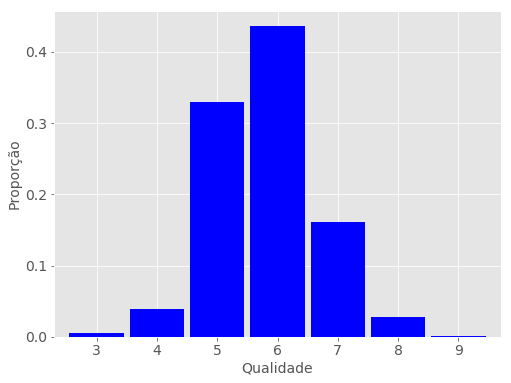

In [13]:
# Variável Resposta : Quality 
plt.figure(figsize=(8,6))
stat = df.groupby('quality')['quality'].agg(lambda x : float(len(x))/df.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="blue")
plt.xticks(rotation=0)
plt.ylabel('Proporção', fontsize=14)
plt.xlabel('Qualidade', fontsize=14)
plt.show()

Podemos observar que o score de qualidade varia de 3 a 9 (não atingindo, pelo menos nessa amostra, os valores 0,1,2 ou 10. Devido a algumas classe apresentarem pouca representatividade (por exemplo, classe 3 e 9) desejamos criar menos classes para realizar a previsão da qualidade do vinho.

In [15]:
# Contagem
df['quality'].value_counts()

6    2306
5    1744
7     849
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

**Correlação entre as variaveis**

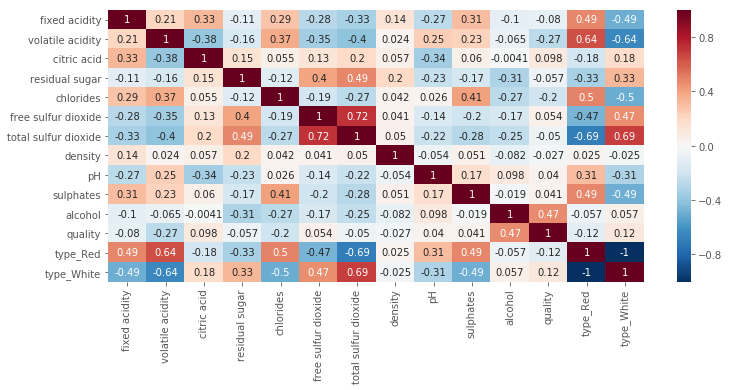

In [67]:
# Correlação entre as variáveis
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

O gráfico de correlação pode indicar que há colinearidade. A colinearidade pode causar coeficientes encontrados no modelo (por exemplo, regressão logística) não estáveis, mudam facilmente. Como efeito disso, a interpretação do modelo pode não ser válida.
Se considerarmos correlação acima de 70% alto, logo, a variável 'free sulfur dioxide' e 'total sulfur dioxide' apresentam 72% de correlação. Nesse caso, poderiamos optar por eliminar uma delas pois terão o mesmo efeito no modelo. Mas optaremos por deixar e ver como os modelos se comportaram.

In [59]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.469674
type_White              0.115588
citric acid             0.098393
free sulfur dioxide     0.054241
sulphates               0.040824
pH                      0.039920
density                -0.026537
total sulfur dioxide   -0.049555
residual sugar         -0.057475
fixed acidity          -0.080232
type_Red               -0.115588
chlorides              -0.201844
volatile acidity       -0.266608
Name: quality, dtype: float64

A variável que que apresenta maior correlação com a variavel 'quality' é 'alcohol' com 47%. 

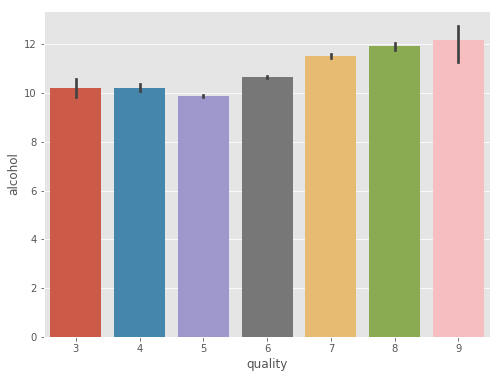

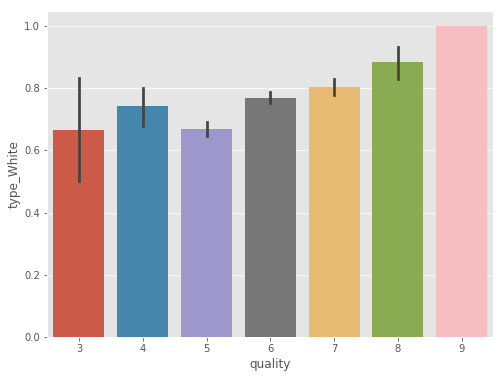

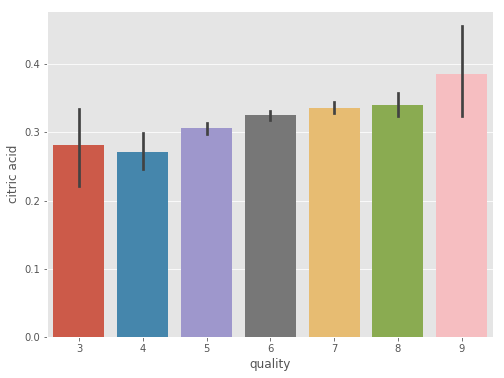

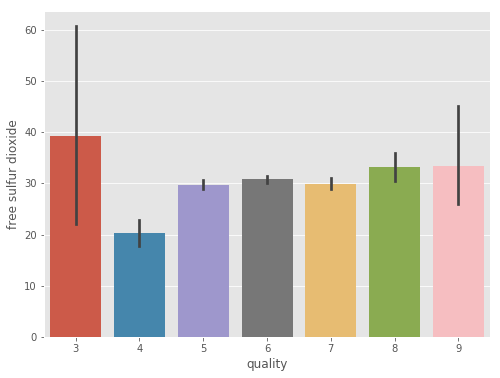

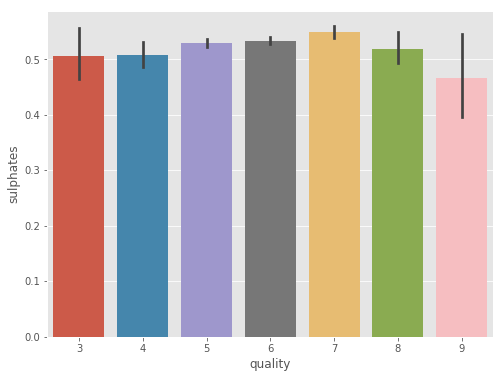

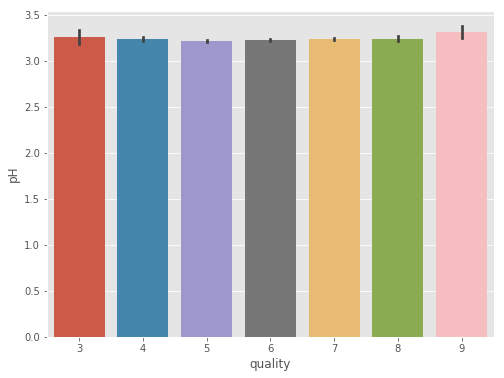

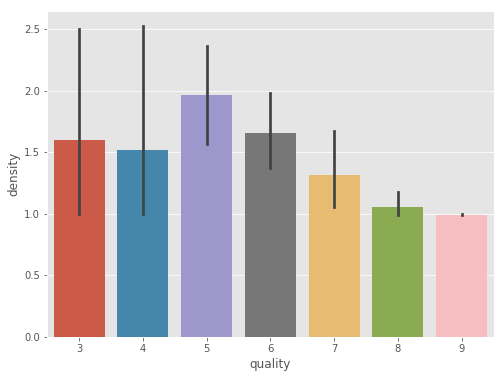

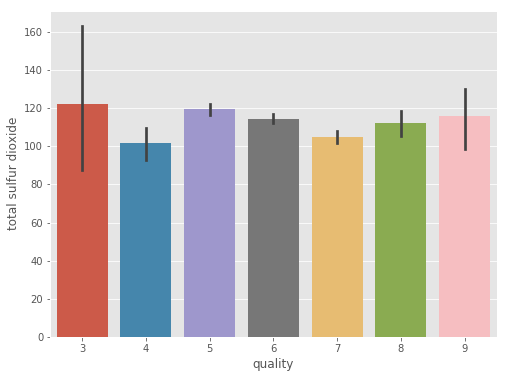

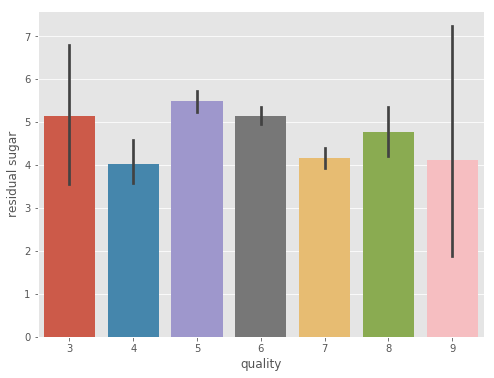

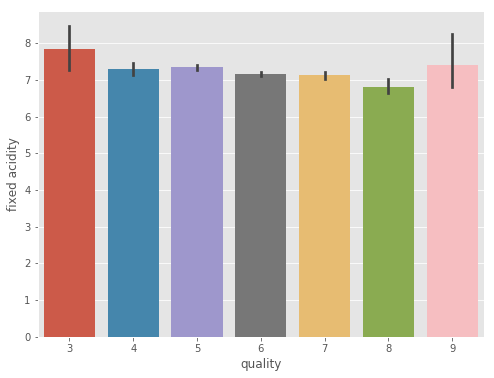

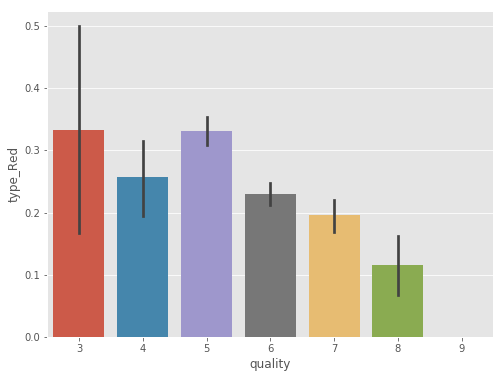

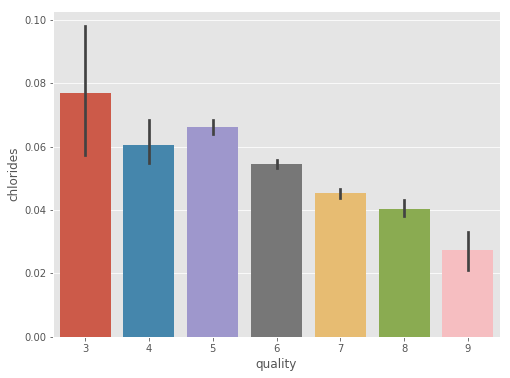

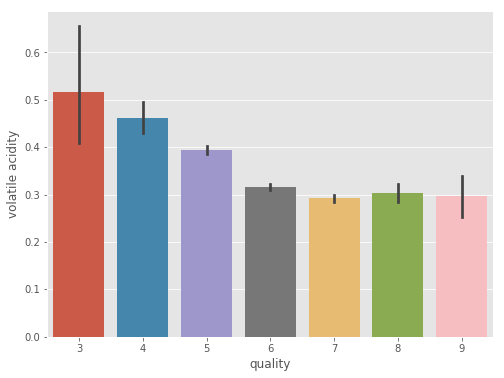

In [62]:
# Gráficos das variaveis em relação a variável resposta

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'type_White', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'density', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'type_Red', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.show()

Alguns comentários sobre as variáveis explicativas:

* Boas candidatas:

**Alcohol** além de apresentar boa correlação com a qualidade, visivelmente quanto maior seu valor (acima de 10,5)  melhor a qualidade do vinho; <br>
**type_white** vinhos do tipo branco aprsentam notas mais elevadas, principalmente, qualidade 9; <br>
**citric acid** argumento similar ao do alcohol, exceto a parte da correlação; <br>
**density** quanto menor a densidade aparente tem uma qualidade maior;  <br>
**type_Red** aparentemente (nada mais) apresenta notas de qualidade mais baixas; <br>
**chlorides** quanto maior seu valor menor a qualidade; <br>
**volatile acidity** quanto maior seu valor menor a qualidade. <br>
<br>
* Sem conclusao clara graficamente

**free sufur dioxide**<br>
**sulphates**<br>
**pH**<br>
**total sufur dioxide**<br>
**residual sugar**<br>
**fixed acidity**<br>

*Importante destacar que uma análise mais aprofundada sobre as variáveis irá trazer melhores resultados ao modelo, ou seja, se realizar uma feature engineering para trazer maiores ganhos.*

### 4. Modelos Preditivos e Avaliação de Performance <a class="anchor" id="4-bullet"></a>

### Pontos a destacar sobre a construção do modelo

**a.** Como foi a definição da sua estratégia de modelagem? <br>

*Esse problema será tratado com um algoritmo superviosado, pois conhecemos a variável resposta. A variavel resposta é categórica e não apresenta um preenchimento adequado em suas categorias, ou seja, são desbalanceados. Uma alternativa seria agrupar os score em classes menores (ex: bons e ruins; ruins, bons e médios,...) ou usufluir de alguma técnica de agrupamento para multi-classes com desbalanceamento. Uma melhor maneira de abordar seria testar as diferentes abordagens e assim escolher aquela que trazer melhores resultados. Dito isso, a estratégia usada para prever a qualidade do vinho foi considerar duas classes (problema de classificação binário) para prever a qualidade do vinho. Além disso, a ideia são testar diferentes algoritimos para tentar encontrar aquele que melhor se adeque ao problema referido.* <br>

**b.** Como foi definida a função de custo utilizada? <br>

*A função custo irá depender do algoritmo selecionado, por exemplo: no caso de árvores de decisão podemos escolher o critério de entropia como função custo; ou no SVM a função custo é dada como maximização da margem (que irá separar as duas classes, no caso de um problema binário); já para uma regressão logística a função custo é dada para miminizar a entropia cruzada (otimizada iterativamente pelo gradiente descendente).* <br>

**c.** Qual foi o critério utilizado na seleção do modelo final?

*Como critério para escolha do modelo final utilizaremos métricas para quantificar o quão bom os modelos se comportaram nesse problema. Existe uma gama de critérios para avaliação de modelos cada um como pontos fortes e fracos. Por isso, vamos tentar escolher o algoritmo que possa maximizar duas métricas escolhidas que são: Acurácia e F1-Score. Um pouco sobre cada uma das métricas: Acurácia: irá medir o quão bem são classificados corretamente tanto para a classe positiva quanto negativa perante todas as classificações realizadas, quanto maior seu valor melhor (entre 0 e 1); F1-Score medida com peso ponderado das métricas de precisão e recall, novamente aqui quanto maior seu valor melhor (entre 0 a 1) * <br>

**d.** Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar este método? <br>

*Como critério utilizado para validação de modelos vamos utilizar o método k-fold (com k=10 folds). Ele consiste em dividir a amostra orignial em k (k<n) partes, treinar com k-1 partes, testa com a que sobrou. Esse processo é repetivo k vezes, cada vez deixando uma parte diferente de fora do treinamento (para teste). A escolha é que esse método apresenta algumas vantagens perante a outros métodos: i) Menos enviesada que o holdout; ii) menos custoso que o leave-one-out; iii) menor variância que a do leave-one-out.* <br>


**e.** Quais evidências você possui de que seu modelo é suficientemente bom?

*Devido ao teste de validação cruzada e mais de um algoritmo testado é possível avaliar o desempenho do modelo. Nessas, análises a métricas no período de validação foram importantes para vermos como o modelo conseguir se comportar em bases que não foram usadas no treinamento. Enfim, como resultado podemos ver que a Random Forest foi aquele modelo que obteve melhor desempenho tanto em acurácio quanto f1-score no período de teste e na validação cruzada. Além disso, como já mencionado um melhor tratamento das variáveis explicativas com feature engineering ajudaria em obter um desempenho melhor.* <br>

**Podemos melhorar ainda mais os modelos realizando o tunning de parâmetros, por meio do grid search. A ideia é otimizar os parâmetros para uma métrica para obter os melhores parâmetros de cada algoritmo.**

### Modelos Propostos

*Testaremos modelos dos mais clássicos até o mais complexo:* <br>

1.Regressão Logística <br>
2.SVM RFB Kernel <br>
3.Árvore de Decisão <br>
4.KNN <br>
5.Random Forest <br>


**Preparação para os algoritmos**

In [16]:
# Binarização da variável resposta
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
df['target'] = pd.cut(df['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder() # Transformar label em numerico

df['target'] = label_quality.fit_transform(df['target'])

In [17]:
# Verificar como ficou a nova variável resposta
df['target'].value_counts()

0    4286
1    1002
Name: target, dtype: int64

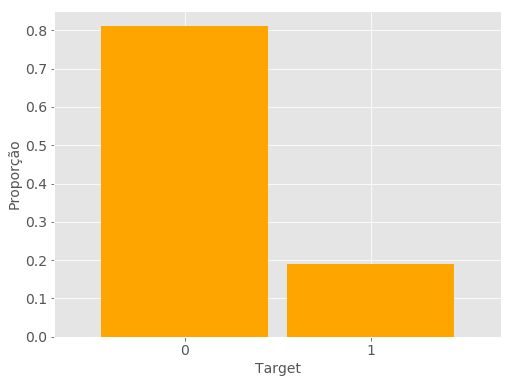

In [18]:
# Variável Resposta : Quality 
plt.figure(figsize=(8,6))
stat = df.groupby('target')['target'].agg(lambda x : float(len(x))/df.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="orange")
plt.xticks(rotation=0)
plt.ylabel('Proporção', fontsize=14)
plt.xlabel('Target', fontsize=14)
plt.show()

**Particionar os dados para treinamento e teste**

In [19]:
# Primeiro separamos a variavel resposta das explicativas
X = df.drop(['quality','target'], axis = 1)
y = df['target']

In [55]:
# Partionando em treino e teste os dados 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:
print("Base para treinamento:", X_train.shape)
print("Base para teste:", X_test.shape)

Base para treinamento: (3701, 13)
Base para teste: (1587, 13)


**Regressão Logistica** <br>

* Avaliando quais são os melhores parâmetros para do modelo logistico. <br>
* Maximizado pelo parametro de regularização $C = 1 / \lambda$. <br>
* $\lambda$: Controla o trade-off do modelo permitir a melhora do modelo em relação a sua complexidade. <br>


In [54]:
C_param_range = [0.001,0.01,0.1,1,10,100]

perf_model = pd.DataFrame(columns = ['C_parameter','Accuracy','F1'])
perf_model['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Aplicando
    logmodel = LogisticRegression(penalty = 'l1', C = i, random_state = 42)
    logmodel.fit(X_train, y_train)
    
    # Predict using model
    y_pred_test = logmodel.predict(X_test)
    
    # Saving accuracy score in table
    perf_model.iloc[j,1] = accuracy_score(y_test,y_pred_test)
    perf_model.iloc[j,2] = f1_score(y_test, y_pred_test)
    j += 1

In [55]:
perf_model

,C_parameter,Accuracy,F1
0,0.001,0.850379,0
1,0.010,0.825758,0.163636
2,0.100,0.850379,0.261682
3,1.000,0.863636,0.419355
4,10.000,0.859848,0.412698
5,100.000,0.857955,0.409449


O parametro C que apresentou melhor desempenho foi **C = 1.0**

In [57]:
# Declaração do modelo - Com Regularização
logmodel = LogisticRegression(penalty = 'l1', C = 1, random_state = 42)

In [58]:
# Treinando o modelo
logmodel.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
# Calcular a predição na base de teste
y_pred_test = logmodel.predict(X_test)

In [60]:
# Métricas para avaliação de performance
print("----------Métricas Teste----------")
print()
print("Acurácia no Teste é: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
print()
print("F1-Score no Teste é: {:.4f}".format(f1_score(y_test, y_pred_test)))
print()
print("Recall no Teste é: {:.4f}".format(recall_score(y_test, y_pred_test)))
print()
print("Precisão no Teste é: {:.4f}".format(precision_score(y_test, y_pred_test)))
print()

# Matriz de Confusão - Base de Teste
print("----------Matriz de Confusão----------")
print()
print(confusion_matrix(y_test, y_pred_test)) 

----------Métricas Teste----------

Acurácia no Teste é: 0.8267

F1-Score no Teste é: 0.3764

Recall no Teste é: 0.2757

Precisão no Teste é: 0.5929

----------Matriz de Confusão----------

[[1229   57]
 [ 218   83]]


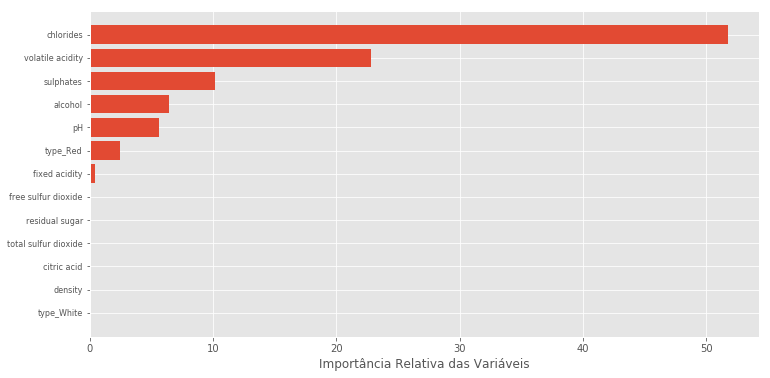

In [61]:
# Importancia das variaveis
feature_importance = abs(logmodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12,6))
featax = featfig.add_subplot(1,1,1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Importância Relativa das Variáveis')

plt.show()

* As variáveis mais importantes do modelo são: **chlorides**; **volatile acidity** e **type_Red**

#### Para não se iludirmos com a perfomance do modelo, no caso da base de teste estar muito parecida com a base de treinamento, o que pode causar para novos dados um desempenho ruim. Devemos usar outra forma de avaliarmos, nesse caso, vamos fazer a validação cruzada (k-Fold) com k=10 e ver a consistência de performance do modelo. 

In [67]:
# Validação Cruzada
kf = KFold(n_splits=10)

kf.get_n_splits(X)

10

In [62]:
# Utilizando a métrica da acurácia e f1-score na validação cruzada com 10 folds

score_test = []
f1_test = []

for train_index, test_index in kf.split(X,y):
    # Segmenta a base para cada fold
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y.iloc[train_index], y.iloc[test_index]
    
    # Treino do modelo
    clf = LogisticRegression(penalty = 'l1', C = 1, random_state = 42)
    clf.fit(X_train_temp, y_train_temp)
    
    # Predição dos dados
    y_pred_test_temp = clf.predict(X_test_temp)
    
    # Métricas de avaliação
    score_test.append(accuracy_score(y_test_temp, y_pred_test_temp))
    
    f1_test.append(f1_score(y_test_temp, y_pred_test_temp))
    
print("Acurácia no Teste é: {:.4f}".format(np.mean(score_test)))
print("F1-Score no Teste é: {:.4f}".format(np.mean(f1_test)))

Acurácia no Teste é: 0.8207
F1-Score no Teste é: 0.3415


* Podemos ver que a **acurácia** do modelo **caiu de 86.36% para 82.07%** e o **F1-Score** **caiu de 41.94% para 34.15%** quando realizamos a validação cruzada com 10 folds.

**SMV - Máquinas de Vetores Suporte** <br>

In [64]:
# Declaração do modelo
svc = SVC()

In [66]:
# Escolhendo os melhores parâmetros do modelo SVM 
param = {
    'C': [0.1,1,10],
    'kernel':['rbf'],
    'gamma' :[0.1,1,10]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [67]:
# Treinando o SVM com alguns parâmetros
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
# Escolhendo os melhores parâmetros
grid_svc.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
# Declaração do modelo
svc = SVC(kernel = 'rbf', gamma = 1, C = 10)

In [70]:
# Treinando o SVM com alguns parâmetros
svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
# Calcular a predição na base de teste
y_pred_test = svc.predict(X_test)

In [72]:
# Métricas para avaliação de performance
print("----------Métricas Teste----------")
print()
print("Acurácia no Teste é: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
print()
print("F1-Score no Teste é: {:.4f}".format(f1_score(y_test, y_pred_test)))
print()
print("Recall no Teste é: {:.4f}".format(recall_score(y_test, y_pred_test)))
print()
print("Precisão no Teste é: {:.4f}".format(precision_score(y_test, y_pred_test)))
print()

# Matriz de Confusão - Base de Teste
print("----------Matriz de Confusão----------")
print()
print(confusion_matrix(y_test, y_pred_test)) 

----------Métricas Teste----------

Acurácia no Teste é: 0.8091

F1-Score no Teste é: 0.0319

Recall no Teste é: 0.0166

Precisão no Teste é: 0.4167

----------Matriz de Confusão----------

[[1279    7]
 [ 296    5]]


**Como podemos observar por mais que esse algoritmo apresentou uma alta acurácia 80.91%, nas demais métricas apresentou um desempenho muito baixo como no f1-score de apenas 3.19%.**

In [73]:
# Validação Cruzada
kf = KFold(n_splits=10)

kf.get_n_splits(X)

10

In [74]:
# Utilizando a métrica da acurácia e f1-score na validação cruzada com 10 folds

score_test = []
f1_test = []

for train_index, test_index in kf.split(X,y):
    # Segmenta a base para cada fold
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y.iloc[train_index], y.iloc[test_index]
    
    # Treino do modelo
    clf = SVC(kernel = 'rbf', gamma = 1, C = 10)
    clf.fit(X_train_temp, y_train_temp)
    
    # Predição dos dados
    y_pred_test_temp = clf.predict(X_test_temp)
    
    # Métricas de avaliação
    score_test.append(accuracy_score(y_test_temp, y_pred_test_temp))
    
    f1_test.append(f1_score(y_test_temp, y_pred_test_temp))
    
print("Acurácia no Teste é: {:.4f}".format(np.mean(score_test)))
print("F1-Score no Teste é: {:.4f}".format(np.mean(f1_test)))

Acurácia no Teste é: 0.8094
F1-Score no Teste é: 0.0235


**Mesmo na validação cruzada o desempenho desse algoritmo foi baixo conforme evidênciado pelo F1-score**

**Árvores de Decisão** <br>

In [75]:
# Declaração do modelo
tree = DecisionTreeClassifier()

In [76]:
# Escolhendo os melhores parâmetros do modelo Árvore de Decisão
param = {'criterion':['gini','entropy'],'max_depth':[50,70,90,120,150]}
grid_tree = GridSearchCV(tree, param_grid=param, scoring='accuracy', cv=10)

In [77]:
# Treinando a árvore de decisão com alguns parâmetros
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [50, 70, 90, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [78]:
# Escolhendo os melhores parâmetros
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 90}

In [79]:
# Declaração do modelo
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 90)

In [80]:
# Treinando a árvore de decisão com os melhores parâmetros
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=90,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# Calcular a predição na base de teste
y_pred_test = tree.predict(X_test)

In [82]:
# Métricas para avaliação de performance
print("----------Métricas Teste----------")
print()
print("Acurácia no Teste é: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
print()
print("F1-Score no Teste é: {:.4f}".format(f1_score(y_test, y_pred_test)))
print()
print("Recall no Teste é: {:.4f}".format(recall_score(y_test, y_pred_test)))
print()
print("Precisão no Teste é: {:.4f}".format(precision_score(y_test, y_pred_test)))
print()

# Matriz de Confusão - Base de Teste
print("----------Matriz de Confusão----------")
print()
print(confusion_matrix(y_test, y_pred_test)) 

----------Métricas Teste----------

Acurácia no Teste é: 0.7832

F1-Score no Teste é: 0.4089

Recall no Teste é: 0.3953

Precisão no Teste é: 0.4235

----------Matriz de Confusão----------

[[1124  162]
 [ 182  119]]


**Esse algoritmo apresentou uma acurácia de 78.32% e um desempenho razoável no F1-score 40.89%**

In [83]:
# Validação Cruzada
kf = KFold(n_splits=10)

kf.get_n_splits(X)

10

In [84]:
# Utilizando a métrica da acurácia e f1-score na validação cruzada com 10 folds

score_test = []
f1_test = []

for train_index, test_index in kf.split(X,y):
    # Segmenta a base para cada fold
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y.iloc[train_index], y.iloc[test_index]
    
    # Treino do modelo
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 90)
    clf.fit(X_train_temp, y_train_temp)
    
    # Predição dos dados
    y_pred_test_temp = clf.predict(X_test_temp)
    
    # Métricas de avaliação
    score_test.append(accuracy_score(y_test_temp, y_pred_test_temp))
    
    f1_test.append(f1_score(y_test_temp, y_pred_test_temp))
    
print("Acurácia no Teste é: {:.4f}".format(np.mean(score_test)))
print("F1-Score no Teste é: {:.4f}".format(np.mean(f1_test)))


Acurácia no Teste é: 0.7597
F1-Score no Teste é: 0.3858


**Na validação cruzada o modelo apresentou uma performance razoável tanto na acurácia quanto f1-score. Para melhorar o modelo devemos rodar mais parâmetro, tratar melhor as variáveis, e evoluir esse modelo que é simples para baggings, boosting,...**

**KNN** <br>

In [85]:
# Encontrar o melhor valor k para o algortimo knn
neighbors = np.arange(1,15)
train_acc = np.empty(len(neighbors))
test_acc  = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Treino do modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Acuracia para a base de treinamento
    train_acc[i] = knn.score(X_train, y_train)
    
    # Acuracia para a base de teste
    test_acc[i] = knn.score(X_test, y_test) 

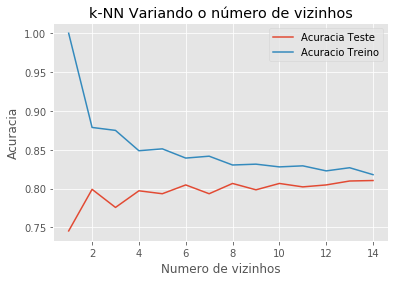

In [86]:
# Gráfico do desempenho
plt.title('k-NN Variando o número de vizinhos')
plt.plot(neighbors, test_acc, label='Acuracia Teste')
plt.plot(neighbors, train_acc, label='Acuracio Treino')
plt.legend()
plt.xlabel('Numero de vizinhos')
plt.ylabel('Acuracia')
plt.show()

In [87]:
# Treinando o modelo com melhor k = 14
knn = KNeighborsClassifier(n_neighbors=14)

In [88]:
# Fitando o modelo
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [89]:
# Calcular a predição na base de teste
y_pred_test = knn.predict(X_test)

In [90]:
# Métricas para avaliação de performance
print("----------Métricas Teste----------")
print()
print("Acurácia no Teste é: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
print()
print("F1-Score no Teste é: {:.4f}".format(f1_score(y_test, y_pred_test)))
print()
print("Recall no Teste é: {:.4f}".format(recall_score(y_test, y_pred_test)))
print()
print("Precisão no Teste é: {:.4f}".format(precision_score(y_test, y_pred_test)))
print()

# Matriz de Confusão - Base de Teste
print("----------Matriz de Confusão----------")
print()
print(confusion_matrix(y_test, y_pred_test)) 

----------Métricas Teste----------

Acurácia no Teste é: 0.8103

F1-Score no Teste é: 0.1173

Recall no Teste é: 0.0664

Precisão no Teste é: 0.5000

----------Matriz de Confusão----------

[[1266   20]
 [ 281   20]]


**Esse algoritmo apresentou uma acurácia de 81.03% e um desempenho razoável no F1-score 11.73%**

In [92]:
# Validação Cruzada
kf = KFold(n_splits=10)

kf.get_n_splits(X)

10

In [93]:
# Utilizando a métrica da acurácia e f1-score na validação cruzada com 10 folds

score_test = []
f1_test = []

for train_index, test_index in kf.split(X,y):
    # Segmenta a base para cada fold
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y.iloc[train_index], y.iloc[test_index]
    
    # Treino do modelo
    knn = KNeighborsClassifier(n_neighbors=14)
    clf = knn.fit(X_train_temp,y_train_temp)
    clf.fit(X_train_temp, y_train_temp)
    
    # Predição dos dados
    y_pred_test_temp = clf.predict(X_test_temp)
    
    # Métricas de avaliação
    score_test.append(accuracy_score(y_test_temp, y_pred_test_temp))
    
    f1_test.append(f1_score(y_test_temp, y_pred_test_temp))
    
print("Acurácia no Teste é: {:.4f}".format(np.mean(score_test)))
print("F1-Score no Teste é: {:.4f}".format(np.mean(f1_test)))


Acurácia no Teste é: 0.8032
F1-Score no Teste é: 0.0952


**Na validação cruzada apresentou um desempenho razoavel de acurácia e baixo de F1-score.**

**Random Forest** <br>

In [95]:
rfc=RandomForestClassifier()

In [96]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

In [98]:
grid_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 6, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
# Escolhendo os melhores parâmetros
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [101]:
rfc = RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)

In [102]:
# Treinando a random forest com os melhores parâmetros
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
# Calcular a predição na base de teste
y_pred_test = rfc.predict(X_test)

In [105]:
# Métricas para avaliação de performance
print("----------Métricas Teste----------")
print()
print("Acurácia no Teste é: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
print()
print("F1-Score no Teste é: {:.4f}".format(f1_score(y_test, y_pred_test)))
print()
print("Recall no Teste é: {:.4f}".format(recall_score(y_test, y_pred_test)))
print()
print("Precisão no Teste é: {:.4f}".format(precision_score(y_test, y_pred_test)))
print()

# Matriz de Confusão - Base de Teste
print("----------Matriz de Confusão----------")
print()
print(confusion_matrix(y_test, y_pred_test)) 

----------Métricas Teste----------

Acurácia no Teste é: 0.8311

F1-Score no Teste é: 0.3738

Recall no Teste é: 0.2658

Precisão no Teste é: 0.6299

----------Matriz de Confusão----------

[[1239   47]
 [ 221   80]]


In [106]:
# Validação Cruzada
kf = KFold(n_splits=10)

kf.get_n_splits(X)

10

In [108]:
# Utilizando a métrica da acurácia e f1-score na validação cruzada com 10 folds

score_test = []
f1_test = []

for train_index, test_index in kf.split(X,y):
    # Segmenta a base para cada fold
    X_train_temp, X_test_temp = X.iloc[train_index], X.iloc[test_index]
    y_train_temp, y_test_temp = y.iloc[train_index], y.iloc[test_index]
    
    # Treino do modelo
    clf = RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
    clf.fit(X_train_temp, y_train_temp)
    
    # Predição dos dados
    y_pred_test_temp = clf.predict(X_test_temp)
    
    # Métricas de avaliação
    score_test.append(accuracy_score(y_test_temp, y_pred_test_temp))
    
    f1_test.append(f1_score(y_test_temp, y_pred_test_temp))
    
print("Acurácia no Teste é: {:.4f}".format(np.mean(score_test)))
print("F1-Score no Teste é: {:.4f}".format(np.mean(f1_test)))


Acurácia no Teste é: 0.8325
F1-Score no Teste é: 0.3596


### 5. Conclusão <a class="anchor" id="5-bullet"></a>

Consolidando os resultados obtidos dos 5 modelos na validação cruzada com (10 folds), utilizando duas métricas (acurácia e f1-score) para avaliar qual é o melhor modelo. Pela tabela abaixo, podemos observar que o que obteve o **maior valor de acurácia (83.25%)** e a segundo melhor f1-score (35.96%, o primeiro obteve 38.58%) foi a **Random Forest (Árvores Aleatórias)**. Esse algoritmo, tem muitas vantagens para conseguir classificar diversos tipos de problemas e nesse caso foi aquele que apresentou melhor desempenho. Outro modelo que teve um bom desempenho foi a regressão logística, modelo clássico que para alguns casos apresenta um desempenho muito satisfatório. <br>

Além disso, podemos mencionar que existem diversos outros algoritmos e técnicas de seleção de variáveis, feature engineering que deveriam ser testadas e usadas para tentar extrair o máximo de performance para esse problema. Outro ponto para destacar, é o fato de ter opitado por trabalhar com uma variável resposta binária, poderiamos ter feitos outros testes para ver se realmente era a melhor estratégia. <br>

Por fim, foi mostrado algumas ferramentas que podem ajudar a obter bom modelos e com uma performance que seja satisfatória para resolução do problema em questão.

In [120]:
I = pd.Index(["Regressão Logística", "SVM", "Árvore de Decisão", "KNN", "Random Forest"], name="rows")
C = pd.Index(["Acurácia", "F1-Score"], name="columns")
df = pd.DataFrame(data=np.matrix([[82.07, 34.15], 
                                  [80.94, 02.35], 
                                  [75.97, 38.58], 
                                  [80.32, 09.52], 
                                  [83.25, 35.96]]), index=I, columns=C)

In [122]:
print(df)

columns              Acurácia  F1-Score
rows                                   
Regressão Logística     82.07     34.15
SVM                     80.94      2.35
Árvore de Decisão       75.97     38.58
KNN                     80.32      9.52
Random Forest           83.25     35.96


# Muito obrigado!